In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
application_record = pd.read_csv('application_record.csv')
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
credit_record = pd.read_csv('credit_record.csv')
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [4]:
print(application_record.CODE_GENDER.value_counts())
print(application_record.CODE_GENDER.value_counts()[0]/((application_record.CODE_GENDER.value_counts()[0])+(application_record.CODE_GENDER.value_counts()[1])))

F    294440
M    144117
Name: CODE_GENDER, dtype: int64
0.6713836513839706


In [5]:
application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [17]:
#KNN Imputation
# from sklearn.impute import KNNImputer
# from sklearn.impute import IterativeImputer
# KNN_imp = KNNImputer()

In [18]:
# application_record_knn = application_record.copy(deep=True)
# application_record_knn.OCCUPATION_TYPE = KNN_imp.fit_transform(application_record.OCCUPATION_TYPE.values.reshape(-1,1))

In [6]:
application_record.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

#### We begin with getting the list of ID that are delinquent and that are not delinquent. For delinquency the customer should have an overdue for 60 days or more.
#### Looking at the data-dictionary we understand that the status for delinquent customers should among 2,3,4,5 atleast once.

We take the following approach
1. Find all the IDS that have such status. IDs will be repeated here. Therefore we take unique IDS
2. After getting the list of delinquent IDs we will create a DataFrame with two columns such that ID-columns hold the IDs and isDelinquent column hold 1 or 0 i.e if our customer was deliquent or not.

##### Following code demonstrate that

In [7]:
credit_record.ID.unique().shape

(45985,)

In [8]:
credit_record.STATUS.value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [9]:
delinquent_ids = credit_record[(credit_record.STATUS == '2') | (credit_record.STATUS == '3') | (credit_record.STATUS == '4') | (credit_record.STATUS == '5')].ID.unique()
short_credit_record = pd.DataFrame(credit_record.ID.unique(),columns=['ID'])
short_credit_record['isDelinquent'] = short_credit_record.apply(lambda x: 1 if x['ID'] in delinquent_ids else 0 ,axis =1)

In [10]:
print(short_credit_record.isDelinquent.sum(),short_credit_record.shape)

667 (45985, 2)


Thus we see that we have a very biased dataset


We will now take the intersection with out applicant database so get Taget column for training and testing purpose.

In [11]:
combined_df = application_record.set_index('ID').join(short_credit_record.set_index('ID'), how='inner')
combined_df.shape

(36457, 18)

In [12]:
combined_df.head()
#Here isDelinquent is our target variable

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,isDelinquent
ID,,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0


In [13]:
combined_df.NAME_HOUSING_TYPE.value_counts()

House / apartment      32548
With parents            1776
Municipal apartment     1128
Rented apartment         575
Office apartment         262
Co-op apartment          168
Name: NAME_HOUSING_TYPE, dtype: int64

In [14]:
combined_df.pivot_table(index=['CODE_GENDER'],columns=['NAME_HOUSING_TYPE'], aggfunc='count')

AMT_INCOME_TOTAL                                        \
NAME_HOUSING_TYPE  Co-op apartment House / apartment Municipal apartment   
CODE_GENDER                                                                
F                               88             22147                 803   
M                               80             10401                 325   

                                                                  \
NAME_HOUSING_TYPE Office apartment Rented apartment With parents   
CODE_GENDER                                                        
F                              117              285          990   
M                              145              290          786   

                     CNT_CHILDREN                                        \
NAME_HOUSING_TYPE Co-op apartment House / apartment Municipal apartment   
CODE_GENDER                                                               
F                              88             22147                 803   
M                              80             10401                 325   

                                    ...     OCCUPATION_TYPE                   \
NAME_HOUSING_TYPE Office apartment  ... Municipal apartment Office apartment   
CODE_GENDER                         ...                                        
F                              117  ...                 536               74   
M                              145  ...                 276              125   

                                                   isDelinquent  \
NAME_HOUSING_TYPE Rented apartment With parents Co-op apartment   
CODE_GENDER                                                       
F                              227          770              88   
M                              212          660              80   

                                                                          \
NAME_HOUSING_TYPE House / apartment Municipal apartment Office apartment   
CODE_GENDER                                                                
F                             22147                 803              117   
M                             10401                 325              145   

                                                 
NAME_HOUSING_TYPE Rented apartment With parents  
CODE_GENDER                                      
F                              285          990  
M                              290          786  

[2 rows x 96 columns]

#### We will start with numerical values.
1. Look for outliers
2. Perform Scaling

In [15]:
combined_df.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'isDelinquent'],
      dtype='object')

<AxesSubplot:>

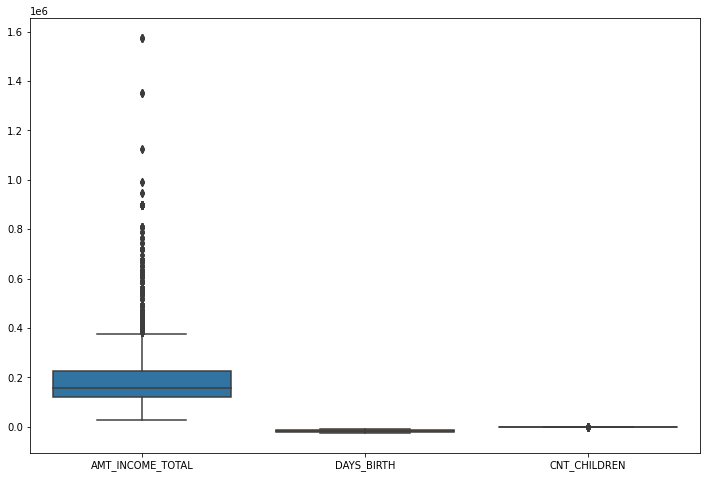

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(data = combined_df[['AMT_INCOME_TOTAL','DAYS_BIRTH','CNT_CHILDREN']])

In [26]:
combined_df.NAME_HOUSING_TYPE.value_counts()

House / apartment      32548
With parents            1776
Municipal apartment     1128
Rented apartment         575
Office apartment         262
Co-op apartment          168
Name: NAME_HOUSING_TYPE, dtype: int64

In [27]:
combined_df.CODE_GENDER.value_counts()

F    24430
M    12027
Name: CODE_GENDER, dtype: int64

In [28]:
combined_df.FLAG_OWN_CAR.value_counts()

N    22614
Y    13843
Name: FLAG_OWN_CAR, dtype: int64

In [29]:
combined_df.FLAG_OWN_REALTY.value_counts()

Y    24506
N    11951
Name: FLAG_OWN_REALTY, dtype: int64

In [30]:
combined_df.CNT_CHILDREN.value_counts()

0     25201
1      7492
2      3256
3       419
4        63
5        20
14        3
7         2
19        1
Name: CNT_CHILDREN, dtype: int64

#### The count of 19 and 14 seem outliers and we need to investigate further.

In [32]:
combined_df[combined_df.CNT_CHILDREN >=14]

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,isDelinquent
ID,,,,,,,,,,,,,,,,,,
5061207,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0,0
5061210,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0,0
5061211,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0,0
5105054,F,N,Y,19,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11057,-1853,1,1,1,0,Waiters/barmen staff,20.0,0


* Single/not-married with 19 children is an outlier.
* 14 individual also seem like an outlier

Lets drop these 4 rows

In [35]:
combined_df = combined_df[~(combined_df.CNT_CHILDREN >=14)]

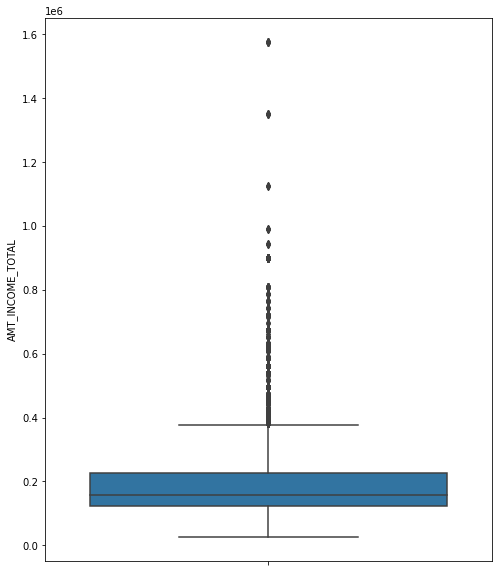

In [38]:
plt.figure(figsize=(8,10))
sns.boxplot(y='AMT_INCOME_TOTAL', data = combined_df)
plt.show()

In [41]:
combined_df['AMT_INCOME_TOTAL'].describe()

count    3.645300e+04
mean     1.866846e+05
std      1.017935e+05
min      2.700000e+04
25%      1.215000e+05
50%      1.575000e+05
75%      2.250000e+05
max      1.575000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

#### Maximum income of Rs 1.5 crore is an possibility and we should not consider it to be an outlier. Also we are planning to standardize our numerical data, so it should be fine.

In [42]:
combined_df.NAME_INCOME_TYPE.value_counts()

Working                 18815
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: NAME_INCOME_TYPE, dtype: int64

In [43]:
combined_df.NAME_FAMILY_STATUS.value_counts()

Married                 25048
Single / not married     4828
Civil marriage           2945
Separated                2100
Widow                    1532
Name: NAME_FAMILY_STATUS, dtype: int64

In [44]:
combined_df.NAME_HOUSING_TYPE.value_counts()

House / apartment      32544
With parents            1776
Municipal apartment     1128
Rented apartment         575
Office apartment         262
Co-op apartment          168
Name: NAME_HOUSING_TYPE, dtype: int64

In [45]:
combined_df.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    24773
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: NAME_EDUCATION_TYPE, dtype: int64

#### We will now check for duplicates. We will begin by resetting the index.

In [47]:
combined_df.reset_index(inplace=True)

In [48]:
combined_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,isDelinquent
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0


In [53]:
combined_df.shape[0] == combined_df.ID.unique().shape[0]

# thus we right now have have all the unique values.

True

##### We check for null

In [54]:
combined_df.isna().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
isDelinquent               0
dtype: int64

##### Occupation Type has null. 

#####  Dropping 30% rows is not a good idea. We should look to impute the values.
1. Impute with a constant unknown
2. Impute with most frequent
3. We can use Algorithms to impute the value
    1. KNN Imputer - But these are categorical values

In [55]:
#constant 'unknown'
combined_df_c = combined_df.copy(deep=True)
from sklearn.impute import SimpleImputer
constant_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='unknown')
combined_df_c.OCCUPATION_TYPE = constant_imputer.fit_transform(combined_df.OCCUPATION_TYPE.values.reshape(-1,1))

In [56]:
combined_df_c.OCCUPATION_TYPE.value_counts()

unknown                  11323
Laborers                  6211
Core staff                3591
Sales staff               3485
Managers                  3012
Drivers                   2135
High skill tech staff     1383
Accountants               1241
Medicine staff            1207
Cooking staff              655
Security staff             592
Cleaning staff             551
Private service staff      344
Low-skill Laborers         175
Waiters/barmen staff       173
Secretaries                151
HR staff                    85
Realty agents               79
IT staff                    60
Name: OCCUPATION_TYPE, dtype: int64

In [57]:
# Most 'Frequent
combined_df_mfq = combined_df.copy(deep=True)
from sklearn.impute import SimpleImputer
most_freq_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
combined_df_mfq.OCCUPATION_TYPE = most_freq_imputer.fit_transform(combined_df.OCCUPATION_TYPE.values.reshape(-1,1))

In [58]:
combined_df_mfq.OCCUPATION_TYPE.value_counts()

Laborers                 17534
Core staff                3591
Sales staff               3485
Managers                  3012
Drivers                   2135
High skill tech staff     1383
Accountants               1241
Medicine staff            1207
Cooking staff              655
Security staff             592
Cleaning staff             551
Private service staff      344
Low-skill Laborers         175
Waiters/barmen staff       173
Secretaries                151
HR staff                    85
Realty agents               79
IT staff                    60
Name: OCCUPATION_TYPE, dtype: int64

In [59]:
print(combined_df_mfq.isna().sum().sum())
print(combined_df_c.isna().sum().sum())
# we see there are no nulls

0
0


In [60]:
combined_df.to_csv('combined_df.csv')
combined_df_c.to_csv('combined_df_c.csv')
combined_df_mfq.to_csv('combined_df_mfq.csv')

TO SAVE COST OF RUNNING AN EMR CLUSTER THESE OPERATIONS WERE PERFORMED ON A PYTHON BASED JUPYTER NOTEBOOK. WE WILL EXPORT THESE DFs TO S3 and USE PYSPARK FOR MODEL BUILDING